In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Graduate - IRISES dataset (2019-06).csv', sep='|')

In [3]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2,virginica
149,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   149 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    object 
 4   Species       150 non-null    object 
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


In [5]:
df.groupby('Species').count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,49,50,50
virginica,50,50,50,50


In [6]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length
count,150.000000,149.000000,150.000000
mean,5.779333,3.061745,3.758000
std,1.197721,0.433963,1.765298
min,-4.800000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.350000
75%,6.400000,3.300000,5.100000
max,7.900000,4.400000,6.900000


In [8]:
df['Petal.Width'] = df['Petal.Width'].replace(',','.', regex=True).astype(float)

In [7]:
df.isna().sum()

Sepal.Length    0
Sepal.Width     1
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [9]:
print('\n',df[df['Sepal.Length'] < 0])
print('', df[df['Sepal.Width'].isna()])


     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
25          -4.8          3.4           1.9          0.2  setosa
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
82           5.5          NaN           3.7          1.0  versicolor


In [10]:
print('\n',df.to_string())


      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
1             5.1          3.5           1.4          0.2      setosa
2             4.9          3.0           1.4          0.2      setosa
3             4.7          3.2           1.3          0.2      setosa
4             4.6          3.1           1.5          0.2      setosa
5             5.0          3.6           1.4          0.2      setosa
6             5.4          3.9           1.7          0.4      setosa
7             4.6          3.4           1.4          0.3      setosa
8             5.0          3.4           1.5          0.2      setosa
9             4.4          2.9           1.4          0.2      setosa
10            4.9          3.1           1.5          0.1      setosa
11            5.4          3.7           1.5          0.2      setosa
12            4.8          3.4           1.6          0.2      setosa
13            4.8          3.0           1.4          0.1      setosa
14            4.3 

In [11]:
# do after splitting values to improve validity of the model 
df.fillna(df.mean(), inplace=True)
df.loc[25,'Sepal.Length'] = 4.8

In [12]:
print(df.loc[25], '\n')
print(df.loc[82])

Sepal.Length       4.8
Sepal.Width        3.4
Petal.Length       1.9
Petal.Width        0.2
Species         setosa
Name: 25, dtype: object 

Sepal.Length           5.5
Sepal.Width        3.06174
Petal.Length           3.7
Petal.Width              1
Species         versicolor
Name: 82, dtype: object


In [13]:
import numpy as np
dft = pd.DataFrame(data={
    'A' : [5, 10, np.nan],
    'B' : [1, np.nan, 3],
})

In [14]:
dft.fillna(dft.mean())

,A,B
0,5.0,1.0
1,10.0,2.0
2,7.5,3.0


In [15]:
print('\n',df.to_string())


      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
1             5.1     3.500000           1.4          0.2      setosa
2             4.9     3.000000           1.4          0.2      setosa
3             4.7     3.200000           1.3          0.2      setosa
4             4.6     3.100000           1.5          0.2      setosa
5             5.0     3.600000           1.4          0.2      setosa
6             5.4     3.900000           1.7          0.4      setosa
7             4.6     3.400000           1.4          0.3      setosa
8             5.0     3.400000           1.5          0.2      setosa
9             4.4     2.900000           1.4          0.2      setosa
10            4.9     3.100000           1.5          0.1      setosa
11            5.4     3.700000           1.5          0.2      setosa
12            4.8     3.400000           1.6          0.2      setosa
13            4.8     3.000000           1.4          0.1      setosa
14            4.3 

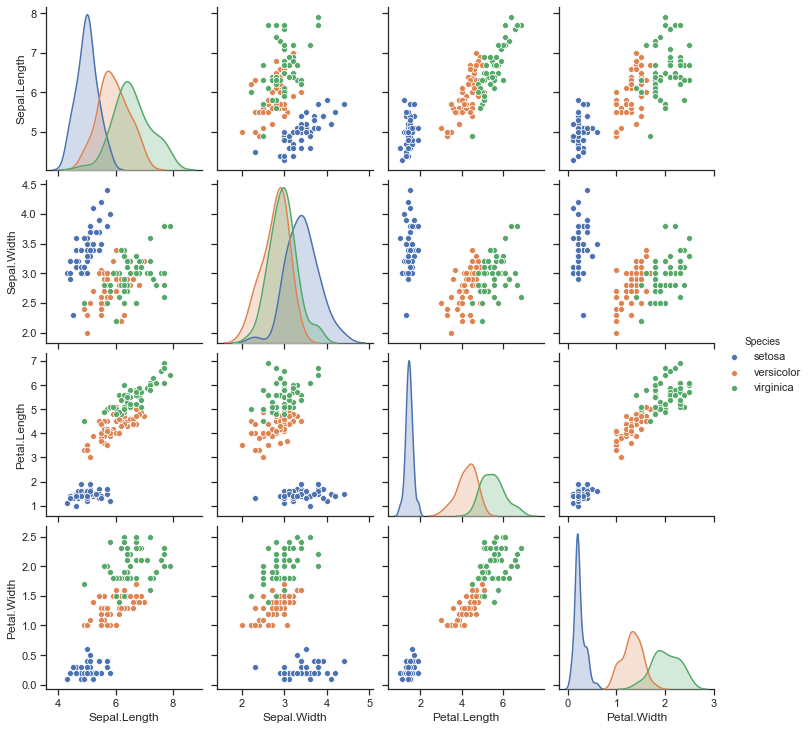

In [16]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df,hue="Species")

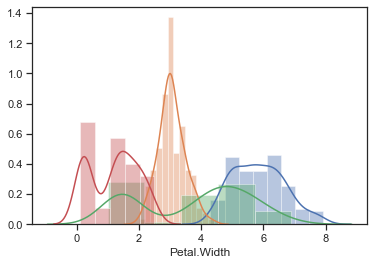

In [17]:
sns.distplot(df['Sepal.Length'])
sns.distplot(df['Sepal.Width'])
sns.distplot(df['Petal.Length'])
sns.distplot(df['Petal.Width'])

In [18]:
from scipy.stats import shapiro

In [19]:
print('Sepal.Length: ',shapiro(df['Sepal.Length']))
print('Sepal.Width: ',shapiro(df['Sepal.Width']))
print('Petal.Length: ',shapiro(df['Petal.Length']))
print('Petal.Width: ',shapiro(df['Petal.Width']))

Sepal.Length:  (0.9760899543762207, 0.010180278681218624)
Sepal.Width:  (0.9844053387641907, 0.08838547766208649)
Petal.Length:  (0.8762689232826233, 7.41295913542217e-10)
Petal.Width:  (0.9018341898918152, 1.680291461525485e-08)


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [21]:
df['Species']

1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
         ...    
146    virginica
147    virginica
148    virginica
149    virginica
150    virginica
Name: Species, Length: 150, dtype: object

In [22]:
df.drop('Species', axis=1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [23]:
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [31]:
sk = StratifiedKFold(n_splits=5, shuffle=True)
accuracy = []
f1score = []
cfm = []
svc = SVC()
lda = LDA()
classifier = lda
X = np.array(df.drop('Species', axis=1))
Y = np.array(df['Species'])
for train, test in sk.split(X, Y):
    classifier.fit(X[train], Y[train])
    predicted = classifier.predict(X[test])
    accuracy.append(accuracy_score(Y[test], predicted) * 100)
    f1score.append(f1_score(Y[test], predicted, average='macro') * 100)
    cfm.append(confusion_matrix(Y[test], predicted, labels=["setosa", "versicolor", "virginica"]))

print("Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
print("F1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1score), np.std(f1score)))
print("\nConfusion Matrix:\n", np.sum(cfm, axis=0),'\nNumber of instances: ', np.sum(cfm))

Accuracy: 98.00% (+/- 2.67%)
F1 score: 98.00% (+/- 2.67%)

Confusion Matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]] 
Number of instances:  150
